In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [19]:
# Load dataset
file_path = 'laptop_prices.csv'  # Change this to your file path
data = pd.read_csv(file_path)

# Show first few rows of the dataset
data.head()


,Brand,Processor,RAM_GB,Storage,GPU,Screen_Size_inch,Resolution,Battery_Life_Hours,Weight_Kg,Operating_System,Price_Dollars
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [20]:
# Check for missing values
data.isnull().sum()


Brand                 0
Processor             0
RAM_GB                0
Storage               0
GPU                   0
Screen_Size_inch      0
Resolution            0
Battery_Life_Hours    0
Weight_Kg             0
Operating_System      0
Price_Dollars         0
dtype: int64

In [23]:

categorical_columns = ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating_System']

# Initialize label encoder
encoder = LabelEncoder()

# Apply label encoding to categorical columns
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

# Show the encoded dataset
data.head()


,Brand,Processor,RAM_GB,Storage,GPU,Screen_Size_inch,Resolution,Battery_Life_Hours,Weight_Kg,Operating_System,Price_Dollars
0,1,0,64,4,3,17.3,2,8.9,1.42,0,3997.07
1,8,2,4,1,6,14.0,0,9.4,2.57,1,1355.78
2,2,5,32,3,5,13.3,3,8.5,1.74,0,2673.07
3,5,5,4,2,6,13.3,0,10.5,3.10,2,751.17
4,8,4,4,2,0,16.0,3,5.7,3.38,1,2059.83


In [24]:
# Define numerical columns
numerical_columns = ['RAM_GB', 'Screen_Size_inch', 'Battery_Life_Hours', 'Weight_Kg']

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Show the scaled dataset
data.head()


,Brand,Processor,RAM_GB,Storage,GPU,Screen_Size_inch,Resolution,Battery_Life_Hours,Weight_Kg,Operating_System,Price_Dollars
0,1,0,1.798907,4,3,1.452880,2,0.378321,-1.379139,0,3997.07
1,8,2,-0.958237,1,6,-0.843674,0,0.595212,0.342695,1,1355.78
2,2,5,0.328430,3,5,-1.330821,3,0.204808,-0.900020,0,2673.07
3,5,5,-0.958237,2,6,-1.330821,0,1.072373,1.136236,2,751.17
4,8,4,-0.958237,2,0,0.548177,3,-1.009783,1.555465,1,2059.83


In [25]:
# Define features (X) and target (y)
X = data.drop('Price_Dollars', axis=1)
y = data['Price_Dollars']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [27]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 607.3607950553894
Mean Squared Error (MSE): 696667.1372459471
Root Mean Squared Error (RMSE): 834.6658836001069
R-squared (R²): 0.6068642443186594


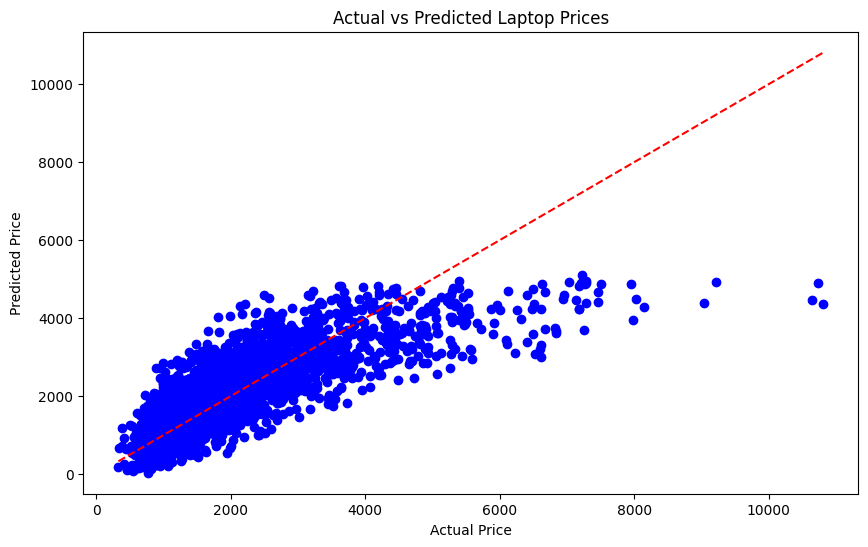

In [28]:
# Actual vs Predicted Prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Laptop Prices')
plt.show()


In [29]:
# Training R-squared
train_r2 = model.score(X_train, y_train)
print(f"Training R-squared: {train_r2}")

# Test R-squared
test_r2 = model.score(X_test, y_test)
print(f"Test R-squared: {test_r2}")


Training R-squared: 0.6087535968144019
Test R-squared: 0.6068642443186594


Mean Absolute Error (MAE): 607.3607950553894
Mean Squared Error (MSE): 696667.1372459471
Root Mean Squared Error (RMSE): 834.6658836001069
R-squared (R²): 0.6068642443186594
Training R-squared: 0.6087535968144019
Test R-squared: 0.6068642443186594


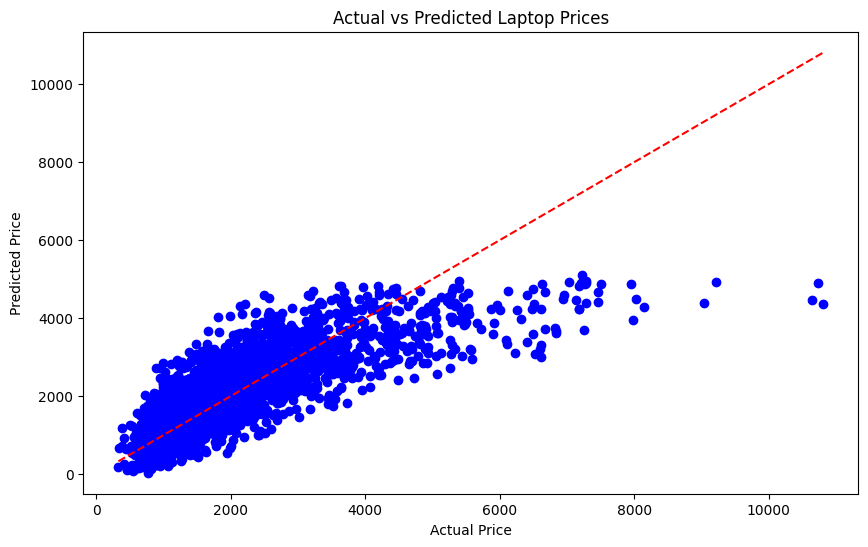

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
file_path = 'laptop_prices.csv'  # Change this to your file path
data = pd.read_csv(file_path)

# Preprocessing
categorical_columns = ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating_System']
encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

numerical_columns = ['RAM_GB', 'Screen_Size_inch', 'Battery_Life_Hours', 'Weight_Kg']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Define features and target
X = data.drop('Price_Dollars', axis=1)
y = data['Price_Dollars']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Training and Test R-squared
train_r2 = model.score(X_train, y_train)
print(f"Training R-squared: {train_r2}")
test_r2 = model.score(X_test, y_test)
print(f"Test R-squared: {test_r2}")

# Actual vs Predicted Prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Laptop Prices')
plt.show()
